In [129]:
%autosave 100
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set_style('darkgrid')
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve,auc,precision_recall_curve,f1_score

Autosaving every 100 seconds


**First, create a dataframe of *cleaned_data.csv*. Then, use scikit-learn's `train_test_split` to make a new set of training and testing data. This time, instead of `EDUCATION`, use `LIMIT_BAL`: the account's credit limit.**

In [130]:
df=pd.read_csv('cleaned_data.csv',index_col=[0])
df.drop('EDUCATION_CAT',inplace=True,axis=1)

In [131]:
X=df.drop('default payment next month',axis=1)
y=df['default payment next month']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

_________________________________________________________________________
**Next, train a logistic regression model using the training data from your split.**


In [132]:
ml=LogisticRegression().fit(X_train.drop('EDUCATION',axis=1),y_train)

C:\Users\sahil\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


_________________________________________________________________________
**Then, create the array of predicted probabilities for the testing data.**


In [133]:
prob=ml.predict_proba(X_test.drop("EDUCATION",axis=1))[:,1]

_________________________________________________________________________
**Next, calculate the ROC AUC using the predicted probabilities and the true labels of the testing data. Compare this to the ROC AUC from using the `EDUCATION` feature.**


In [134]:
print('ROC AUC WITHOUT EDUCATION ',roc_auc_score(y_test,prob))
print('\n')
ml2=LogisticRegression().fit(X_train,y_train)
prob2=ml2.predict_proba(X_test)[:,1]
print('ROC AUC WITH EDUCATION ',roc_auc_score(y_test,prob2))

ROC AUC WITHOUT EDUCATION  0.6504626722077737


ROC AUC WITH EDUCATION  0.6506073711996688


C:\Users\sahil\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


_________________________________________________________________________
**Now, plot the ROC curve.**


In [135]:
w_fpr,w_tpr,w_thras=roc_curve(y_test,prob)



In [136]:
thras

array([1.56235542e+00, 5.62355416e-01, 5.53965523e-01, ...,
       2.16234607e-05, 2.04668900e-05, 4.27169018e-21])

No handles with labels found to put in legend.


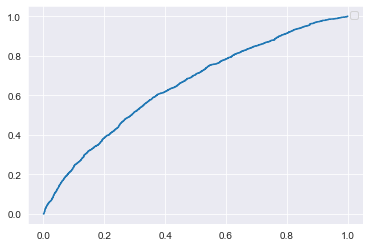

In [117]:
plt.plot(w_fpr,w_tpr,linestyle='-')
plt.legend()

_________________________________________________________________________
**Then, calculate the data for the precision-recall curve on the testing data using scikit-learn functionality.**


In [118]:
precision,recall,thre=precision_recall_curve(y_test,prob)

_________________________________________________________________________
**Plot the precision-recall curve using matplotlib.**


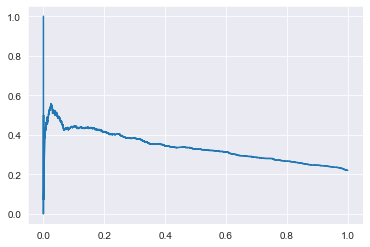

In [119]:
plt.plot(recall,precision)


_________________________________________________________________________
**Now, use scikit-learn to calculate the area under the precision-recall curve.**


In [120]:
print(auc(recall,precision))

0.33753318718225767


_________________________________________________________________________
**Finally, recalculate the ROC AUC, except this time do it for the training data.**

In [121]:
prob3=ml.predict_proba(X_train.drop("EDUCATION",axis=1))[:,1]
roc_auc_score(y_train,prob3)

0.6562867587625336

    How is this different, conceptually and quantitatively, from your earlier calculation?
